## Problem 1:
###  You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

#### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. 

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [46]:
data = pd.read_excel("C:/Users/2261092/Downloads/Election_Data (1).xlsx")

In [47]:
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [48]:
data.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [49]:
print("The dataset has {} number of rows and {} number of columns.".format(data.shape[0],data.shape[1]))

The dataset has 1525 number of rows and 10 number of columns.


In [50]:
data.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [52]:
data.age.mean()

54.18229508196721

In [53]:
data.age.std()

15.711208571641977

In [8]:
data.duplicated().sum()

0

In [9]:
 data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


#### 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

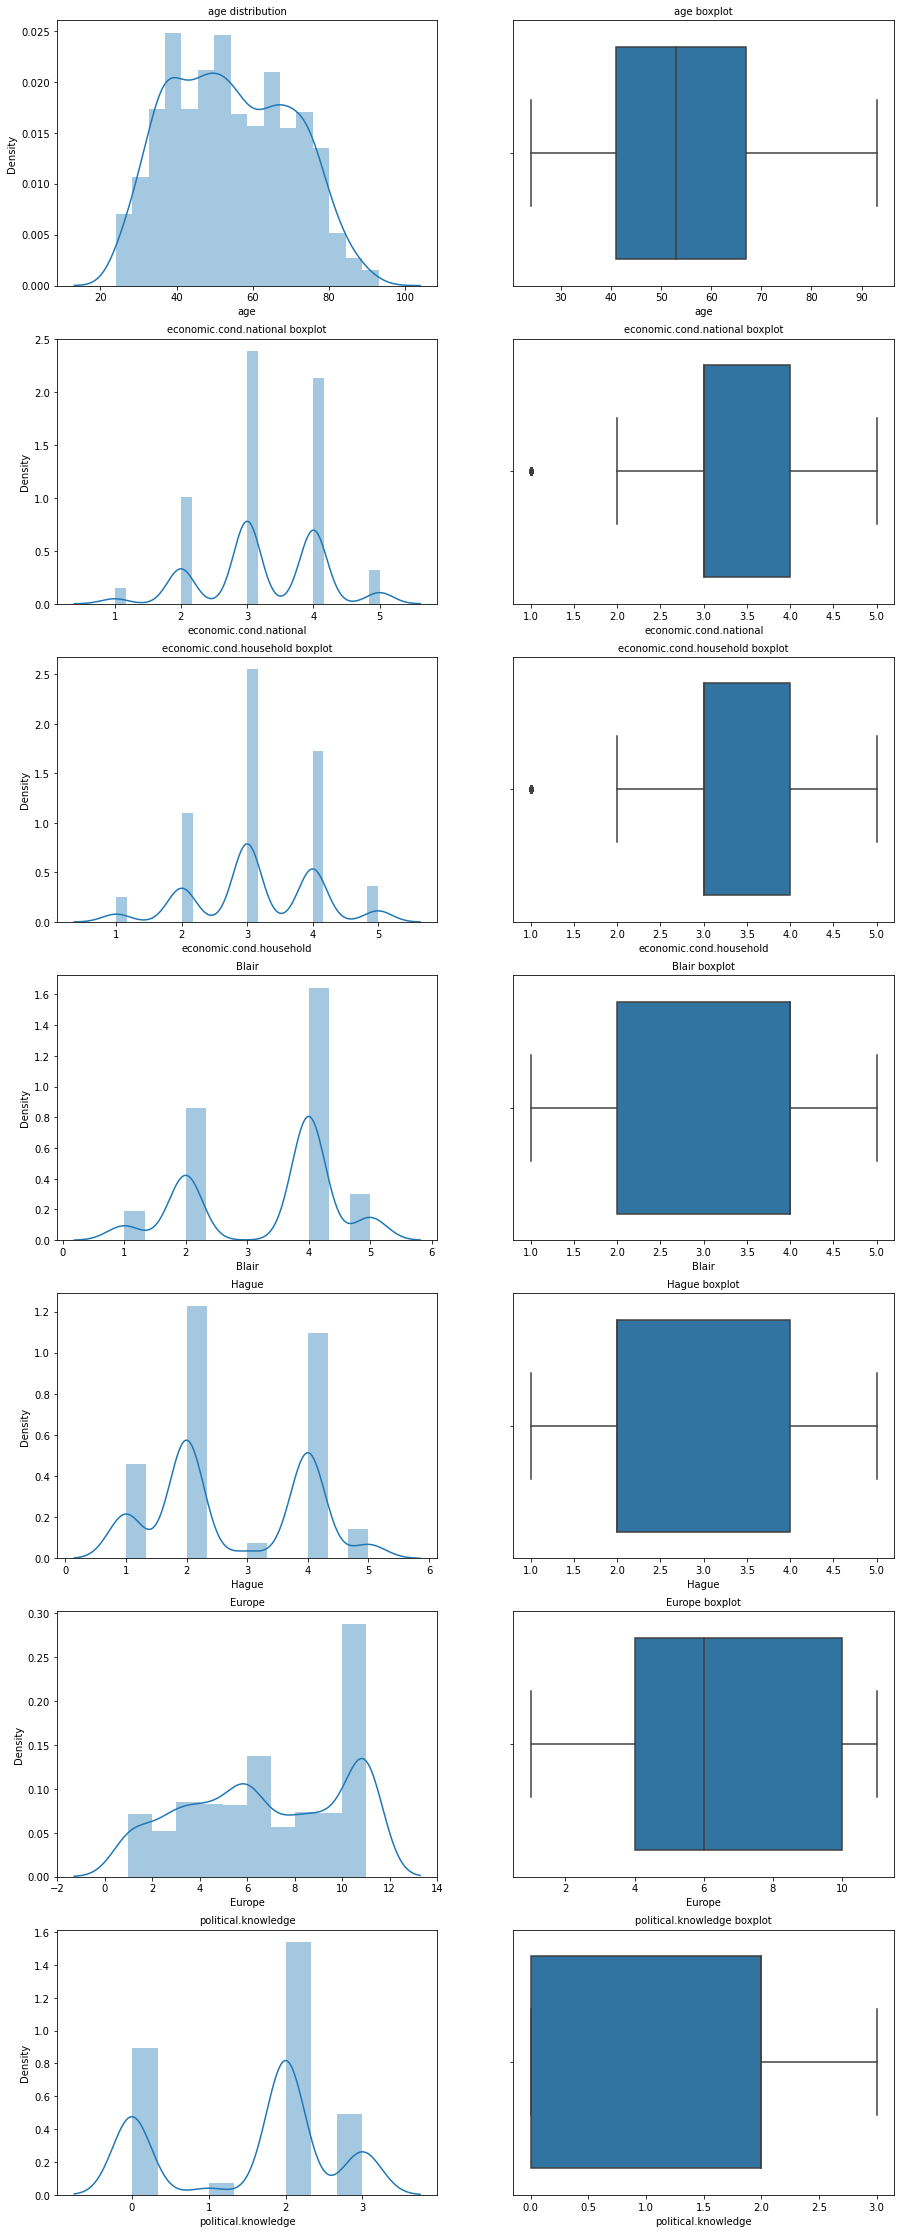

In [11]:
#Univariate analysis
fig, axes = plt.subplots(nrows=7, ncols=2)
fig.set_size_inches(15,40)

a=sns.distplot(data['age'], ax=axes[0][0])
a.set_title('age distribution', fontsize=10)

a=sns.boxplot(data['age'], orient = 'v', ax=axes[0][1])
a.set_title('age boxplot', fontsize=10)

a=sns.distplot(data['economic.cond.national'], ax=axes[1][0])
a.set_title('economic.cond.national boxplot', fontsize=10)

a=sns.boxplot(data['economic.cond.national'], orient = 'v',ax=axes[1][1])
a.set_title('economic.cond.national boxplot',  fontsize=10)

a=sns.distplot(data['economic.cond.household'], ax=axes[2][0])
a.set_title('economic.cond.household boxplot', fontsize=10)

a=sns.boxplot(data['economic.cond.household'], orient = 'v',ax=axes[2][1])
a.set_title('economic.cond.household boxplot',  fontsize=10)

a=sns.distplot(data['Blair'], ax=axes[3][0])
a.set_title('Blair', fontsize=10)

a=sns.boxplot(data['Blair'], orient = 'v',ax=axes[3][1])
a.set_title('Blair boxplot',  fontsize=10)

a=sns.distplot(data['Hague'], ax=axes[4][0])
a.set_title('Hague', fontsize=10)

a=sns.boxplot(data['Hague'], orient = 'v',ax=axes[4][1])
a.set_title('Hague boxplot',  fontsize=10)

a=sns.distplot(data['Europe'], ax=axes[5][0])
a.set_title('Europe', fontsize=10)

a=sns.boxplot(data['Europe'], orient = 'v',ax=axes[5][1])
a.set_title('Europe boxplot',  fontsize=10)

a=sns.distplot(data['political.knowledge'], ax=axes[6][0])
a.set_title('political.knowledge', fontsize=10)

a=sns.boxplot(data['political.knowledge'], orient = 'v',ax=axes[6][1])
a.set_title('political.knowledge boxplot',  fontsize=10)

plt.show()

In [12]:
data_num=data.select_dtypes(['float64','int64'])
data_cat=data.select_dtypes(['object'])

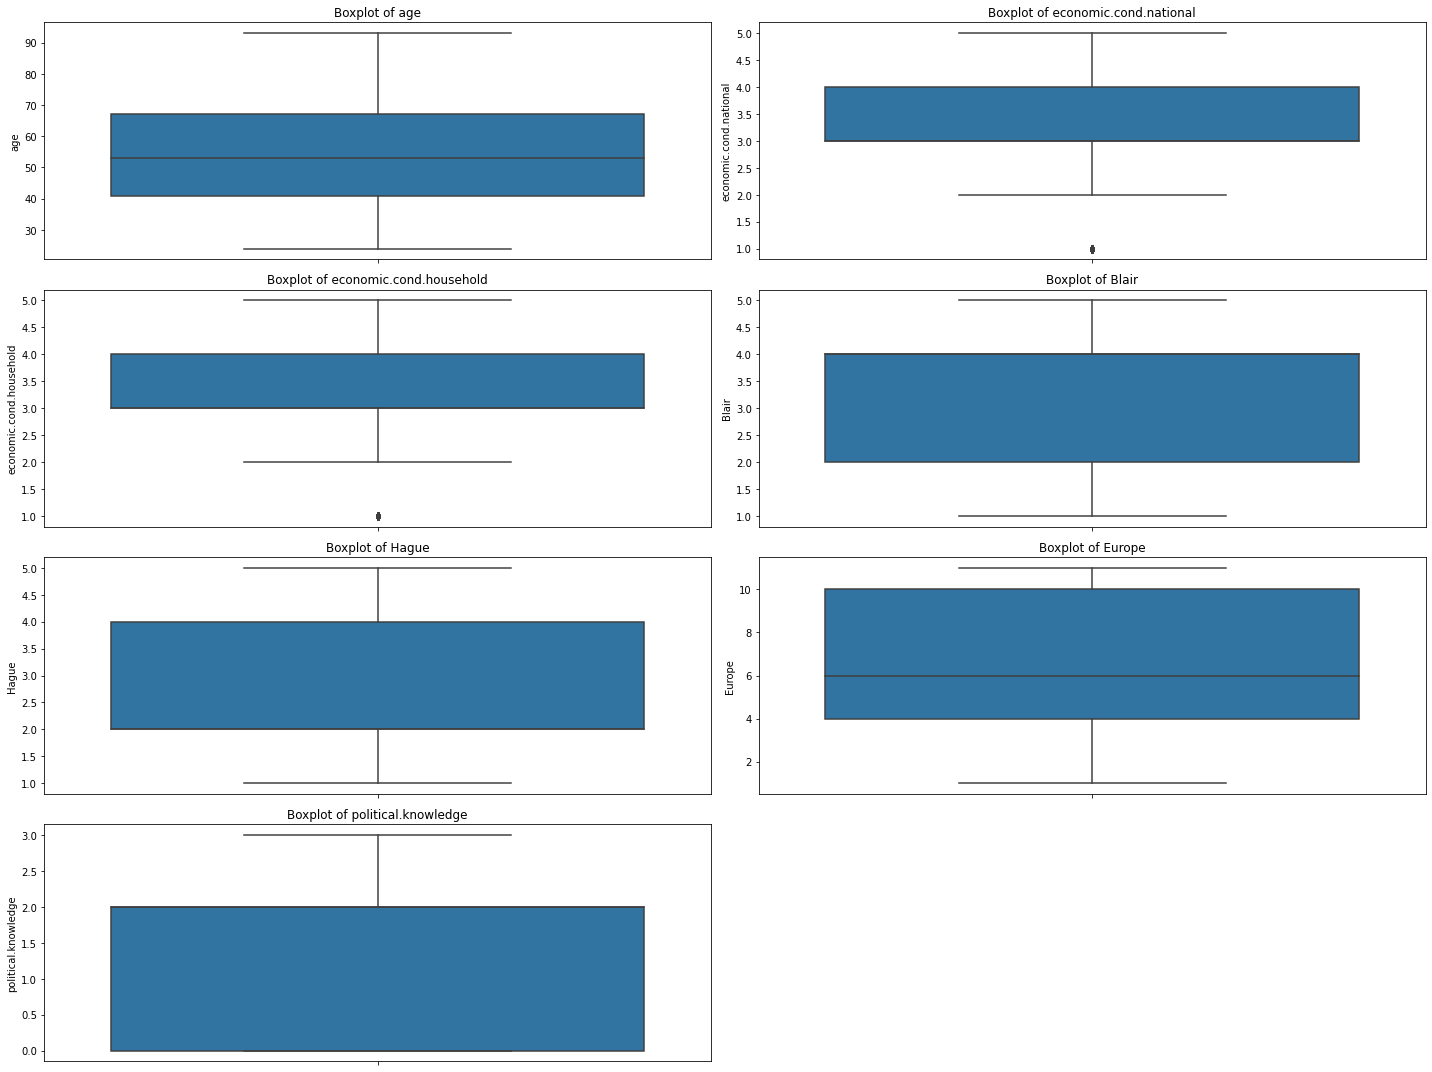

In [13]:
plt.figure(figsize=(20,15))
feature_list=data_num.columns
for i in range(len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.boxplot(y=data_num[feature_list[i]], data=data_num)
    plt.title('Boxplot of {}'. format(feature_list[i]))
    plt.tight_layout()

In [14]:
data.groupby(['vote']).count()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,,,,,,,,
Conservative,462,462,462,462,462,462,462,462
Labour,1063,1063,1063,1063,1063,1063,1063,1063


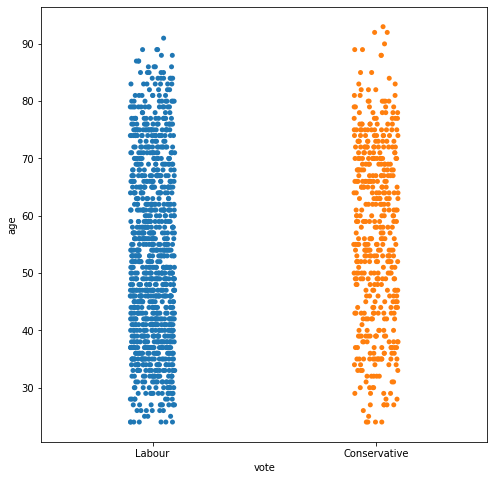

In [15]:
plt.figure(figsize=(8,8))
sns.stripplot(data['vote'], data['age'], jitter=True)
plt.show()

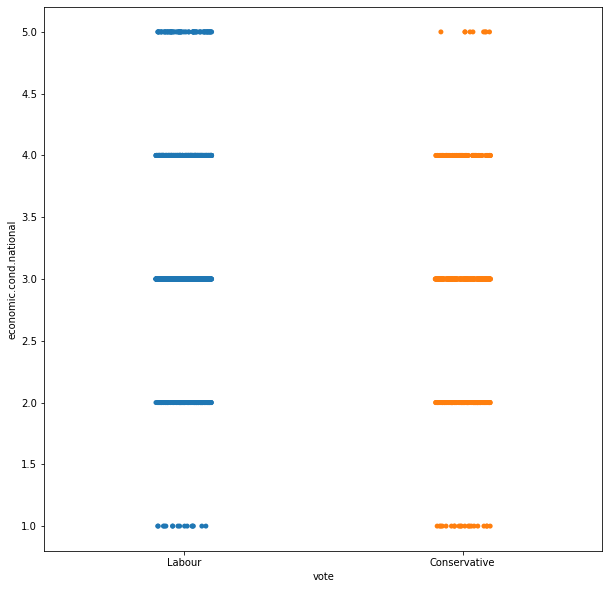

In [16]:
plt.figure(figsize=(10,10))
sns.stripplot(data['vote'], data['economic.cond.national'], jitter=True)
plt.show()

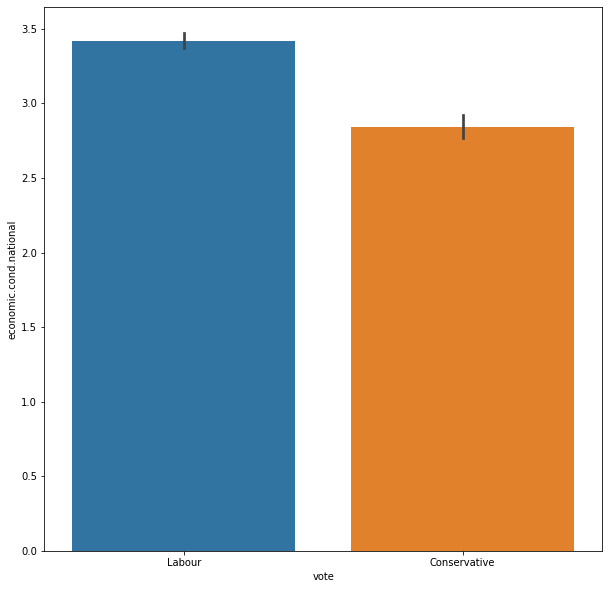

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(data['vote'], data['economic.cond.national'])
plt.show()

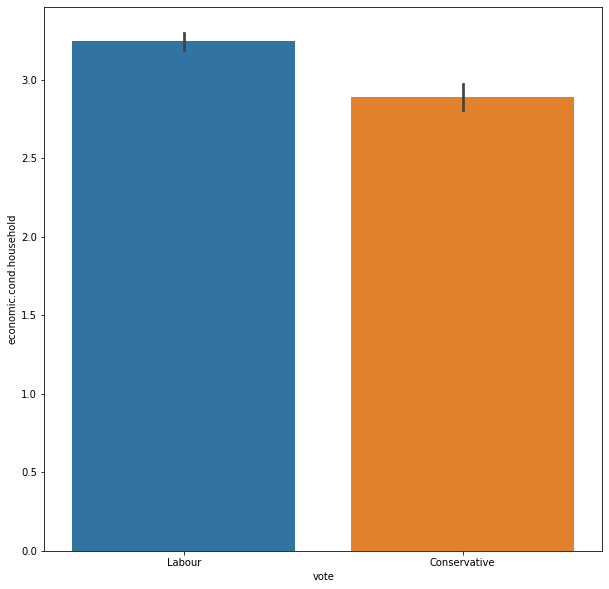

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(data['vote'], data['economic.cond.household'])
plt.show()

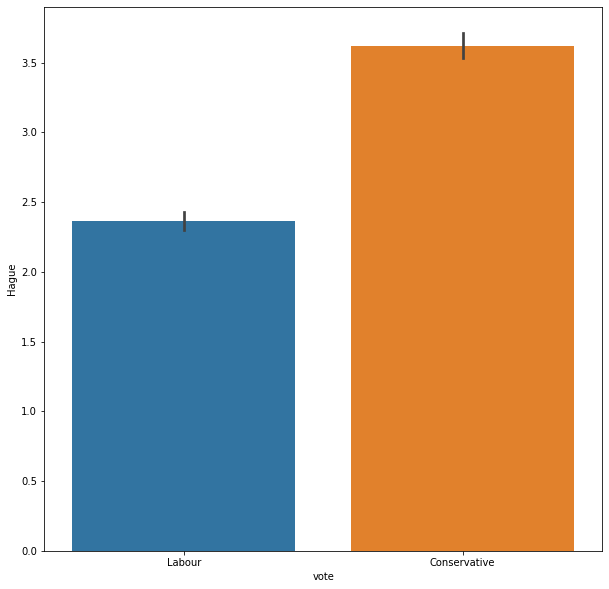

In [19]:
plt.figure(figsize=(10,10))
sns.barplot(data['vote'], data['Hague'])
plt.show()

In [20]:
def univariate_analysis_category(data_cat):
    print('details of '+data_cat)
    print(data[data_cat].value_counts())
    
    plt.figure()
    data[data_cat].value_counts().plot.bar(title='frequency distribution of '+data_cat)
    plt.show()
    print("    ")

details of vote
Labour          1063
Conservative     462
Name: vote, dtype: int64


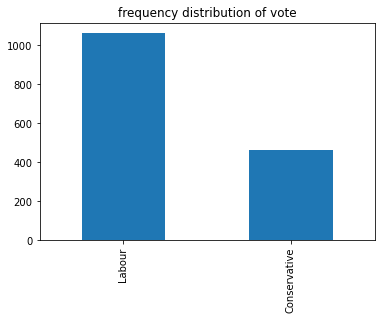

    
details of gender
female    812
male      713
Name: gender, dtype: int64


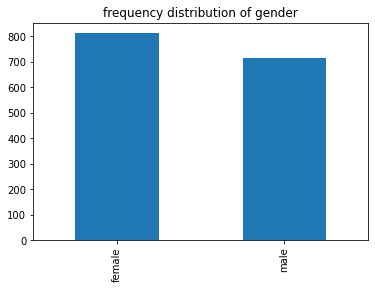

In [21]:
for x in data_cat:
    univariate_analysis_category(x)

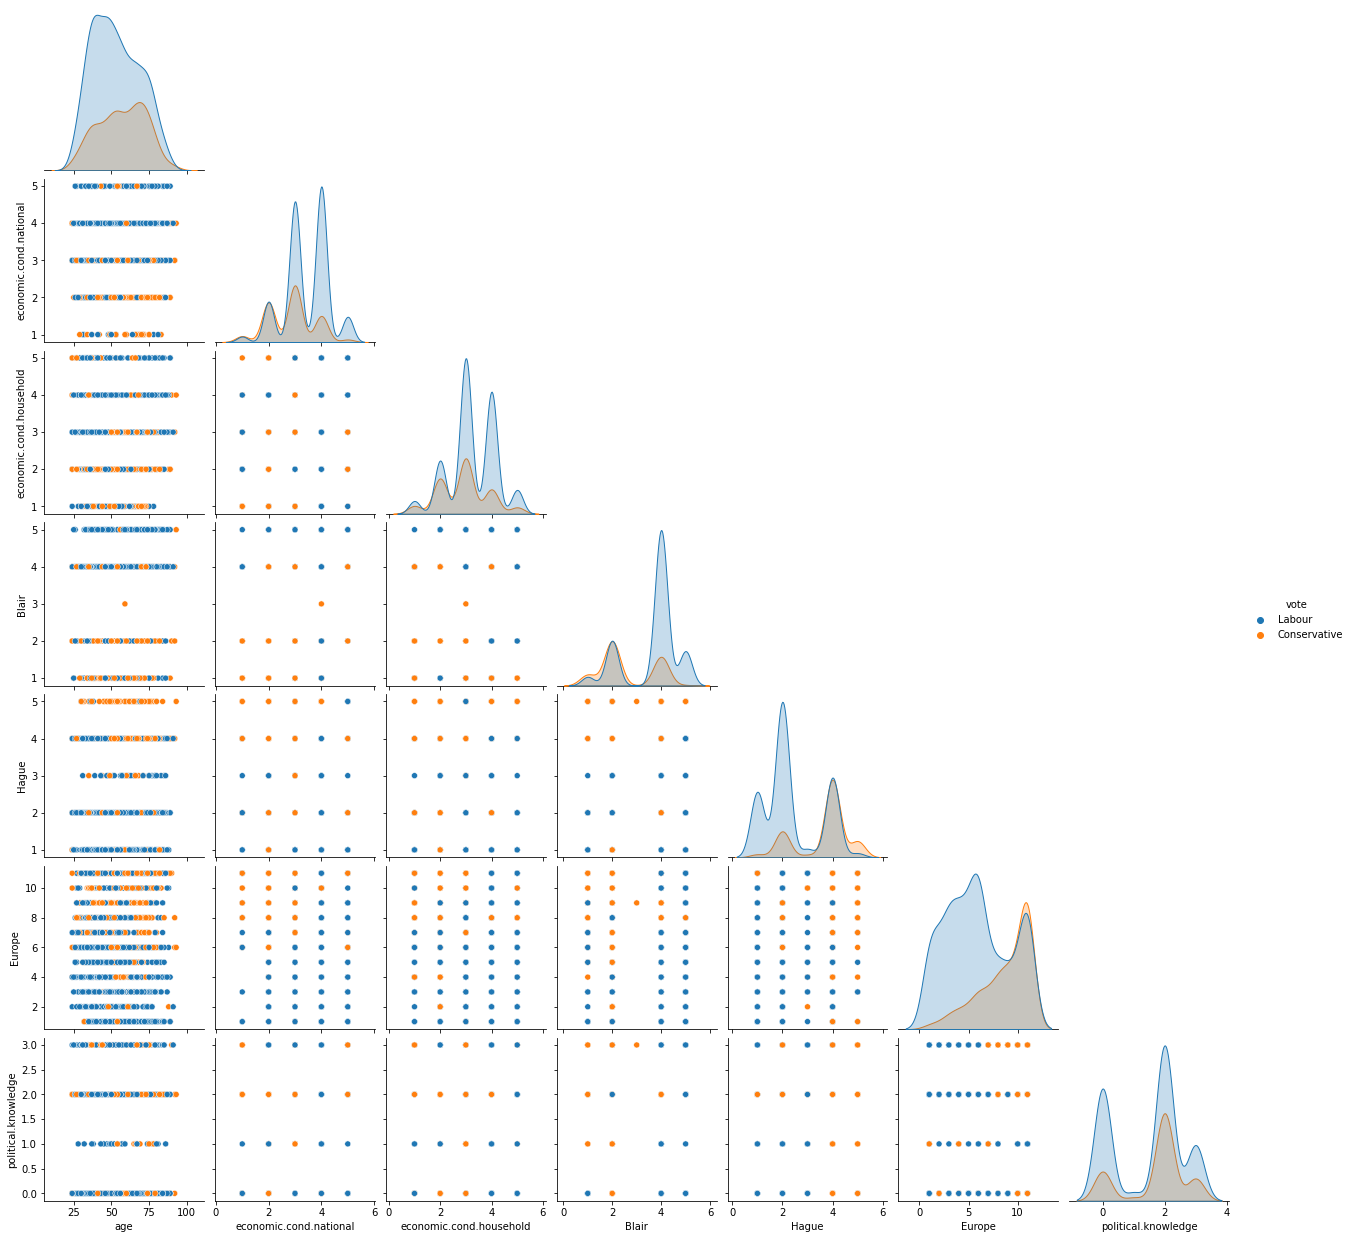

In [22]:
#Bivariate analysis
sns.pairplot(data, hue='vote', corner=True)

<AxesSubplot:>

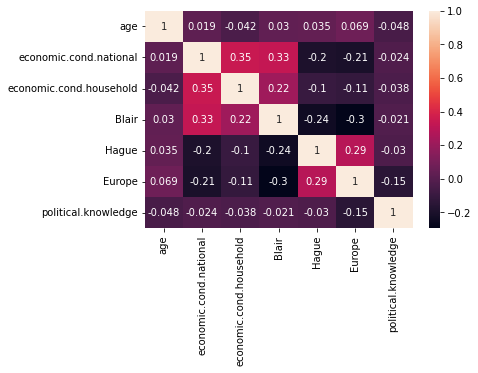

In [23]:
sns.heatmap(data_num.corr(), annot=True)

#### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [24]:
#encoding
data.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [25]:
data['vote']=data['vote'].astype('category')

In [26]:
data['vote']=np.where(data['vote']=='Labour', 1, data['vote'])
data['vote']=np.where(data['vote']=='conservative', 0, data['vote'])

In [27]:
data = pd.get_dummies(data, columns=['gender'])

In [28]:
data.head().T

,0,1,2,3,4
vote,1,1,1,1,1
age,43,36,35,24,41
economic.cond.national,3,4,4,4,2
economic.cond.household,3,4,4,2,2
Blair,4,4,5,2,1
Hague,1,4,2,1,1
Europe,2,5,3,4,6
political.knowledge,2,2,2,0,2
gender_female,1,0,0,1,0
gender_male,0,1,1,0,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender_female            1525 non-null   uint8 
 9   gender_male              1525 non-null   uint8 
dtypes: int64(7), object(1), uint8(2)
memory usage: 98.4+ KB


In [30]:
data['vote']=pd.Categorical(data['vote']).codes

In [31]:
data.dtypes

vote                        int8
age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender_female              uint8
gender_male                uint8
dtype: object

In [32]:
df=data.copy()

In [33]:
#splitting the data
X = df.drop('vote', axis=1)
y = df[['vote']]

In [34]:
#applying logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=df['vote'], random_state=1)
type(X_train)

pandas.core.frame.DataFrame

In [35]:
X_train.shape

(1067, 9)

In [36]:
X_test.shape

(458, 9)

In [37]:
y_train.shape

(1067, 1)

In [38]:
y_test.shape

(458, 1)

In [39]:
#fit the logistic regression model
model = LogisticRegression(solver='newton-cg', max_iter=500, penalty='none', verbose=True, n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.4s finished


LogisticRegression(max_iter=500, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [40]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [41]:
ytrain_predict

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [42]:
ytest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [43]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.540042,0.459958
1,0.675568,0.324432
2,0.970162,0.029838
3,0.671246,0.328754
4,0.741809,0.258191


In [44]:
ytest_predict_prob

array([[0.54004178, 0.45995822],
       [0.67556788, 0.32443212],
       [0.97016159, 0.02983841],
       [0.67124648, 0.32875352],
       [0.74180869, 0.25819131],
       [0.95040017, 0.04959983],
       [0.9166611 , 0.0833389 ],
       [0.87702847, 0.12297153],
       [0.59378408, 0.40621592],
       [0.81567741, 0.18432259],
       [0.98520213, 0.01479787],
       [0.44051428, 0.55948572],
       [0.98301319, 0.01698681],
       [0.96891026, 0.03108974],
       [0.53137334, 0.46862666],
       [0.13216568, 0.86783432],
       [0.19362917, 0.80637083],
       [0.94959067, 0.05040933],
       [0.30795033, 0.69204967],
       [0.98529559, 0.01470441],
       [0.92461487, 0.07538513],
       [0.29229001, 0.70770999],
       [0.88295461, 0.11704539],
       [0.23633577, 0.76366423],
       [0.95107019, 0.04892981],
       [0.39320764, 0.60679236],
       [0.88871533, 0.11128467],
       [0.34986239, 0.65013761],
       [0.94577821, 0.05422179],
       [0.73455653, 0.26544347],
       [0.

In [45]:
ytrain_predict_prob=model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.979324,0.020676
1,0.984566,0.015434
2,0.830467,0.169533
3,0.991721,0.008279
4,0.566082,0.433918


In [46]:
#Accuracy:- training data
model.score(X_train, y_train)

0.8256794751640113

In [47]:
#AUC and ROC for training data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

AUC: 0.879


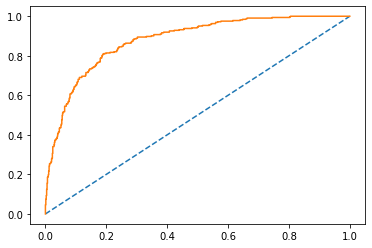

In [48]:
probs=model.predict_proba(X_train)
probs=probs[:,1]
auc=roc_auc_score(y_train, probs)
print('AUC: %.3f' %auc)
train_fpr, train_tpr, train_thresholds=roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr, train_tpr)

AUC: 0.912


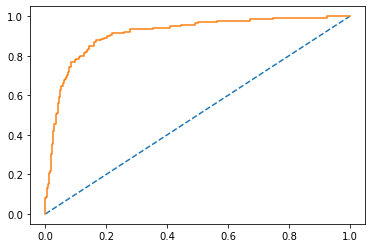

In [49]:
#AUC and ROC for test data
#predict probabiltiy
probs=model.predict_proba(X_test)
probs=probs[:,1]
auc=roc_auc_score(y_test, probs)
print('AUC: %.3f' %auc)
test_fpr, test_tpr, test_thresholds=roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr, test_tpr)

In [50]:
#Confusion matrix for training data
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix

In [51]:
confusion_matrix(y_train, ytrain_predict)

array([[673,  71],
       [115, 208]], dtype=int64)

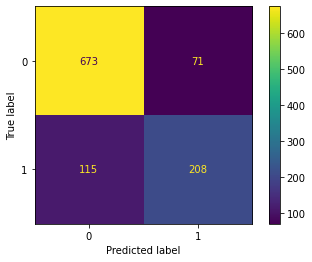

In [52]:
plot_confusion_matrix(model,X_train,y_train)

In [53]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       744
           1       0.75      0.64      0.69       323

    accuracy                           0.83      1067
   macro avg       0.80      0.77      0.78      1067
weighted avg       0.82      0.83      0.82      1067



In [54]:
#Confusion matrix for test data
confusion_matrix(y_test, ytest_predict)

array([[300,  19],
       [ 45,  94]], dtype=int64)

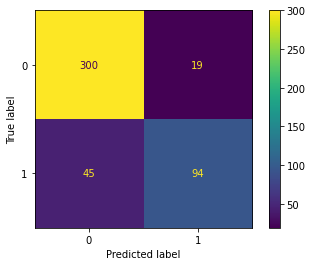

In [55]:
plot_confusion_matrix(model, X_test, y_test)

In [56]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       319
           1       0.83      0.68      0.75       139

    accuracy                           0.86       458
   macro avg       0.85      0.81      0.82       458
weighted avg       0.86      0.86      0.86       458



In [57]:
#Applying GridSearchCV for logistic regression
from sklearn.model_selection import train_test_split, GridSearchCV

In [58]:
grid={'penalty':['l2','none'],
     'solver':['liblinear','lb']}

In [59]:
model=LogisticRegression(max_iter=500, n_jobs=2)

In [60]:
grid_search=GridSearchCV(estimator=model, param_grid=grid, cv=3, n_jobs=-1, scoring='f1')

In [62]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['liblinear', 'lb']},
             scoring='f1')

In [63]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear'} 

LogisticRegression(max_iter=500, n_jobs=2, solver='liblinear')


In [65]:
best_model=grid_search.best_estimator_

In [66]:
#Predict on the training set
ytrain_predict=best_model.predict(X_train)
ytest_predict=best_model.predict(X_test)

In [68]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.529169,0.470831
1,0.650203,0.349797
2,0.970193,0.029807
3,0.644778,0.355222
4,0.729277,0.270723


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       744
           1       0.74      0.65      0.69       323

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067
 



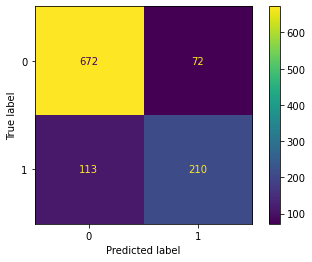

In [69]:
plot_confusion_matrix(best_model, X_train, y_train)
print(classification_report(y_train, ytrain_predict),'\n')

#### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [71]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [73]:
clf=LinearDiscriminantAnalysis()
model=clf.fit(X, y)
model

LinearDiscriminantAnalysis()

In [74]:
#intercept value
clf.intercept_

array([-3.57029758])

In [75]:
clf.coef_

array([[ 0.02374761, -0.42134325, -0.07214287, -0.76546462,  0.96351607,
         0.23095452,  0.49849114,  0.03376577, -0.03376577]])

In [76]:
X_train.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender_female',
       'gender_male'],
      dtype='object')

In [77]:
a=clf.coef_
np.round(a,2)

array([[ 0.02, -0.42, -0.07, -0.77,  0.96,  0.23,  0.5 ,  0.03, -0.03]])

In [78]:
#Training data class prediction with a cut-off value of 0.5
pred_class_train=model.predict(X_train)

#Testing data class prediction with a cut-off value of 0.5
pred_class_test=model.predict(X_test)

Text(0.5, 1.0, 'Testing Data')

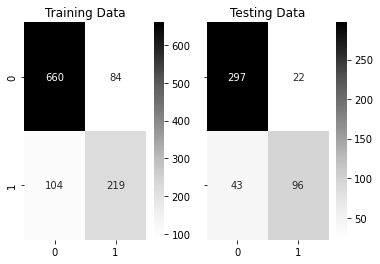

In [87]:
f, a = plt.subplots(1,2,sharex=True, sharey=True, squeeze=False)
#plot confusion matrix
plot_0=sns.heatmap((metrics.confusion_matrix(y_train, pred_class_train)), annot=True, fmt='.5g', cmap='Greys', ax=a[0][0]);a[0][0].set_title('Training Data')
a[0][0].set_title('Training Data')

plot_0=sns.heatmap((metrics.confusion_matrix(y_test, pred_class_test)), annot=True, fmt='.5g', cmap='Greys', ax=a[0][1]);a[0][1].set_title('Test Data')
a[0][1].set_title('Testing Data')

In [91]:
print('Classification Report of the training data:\n\n', metrics.classification_report(y_train, pred_class_train),'\n')
print('Classification Report of the testing data:\n\n', metrics.classification_report(y_test, pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.86      0.89      0.88       744
           1       0.72      0.68      0.70       323

    accuracy                           0.82      1067
   macro avg       0.79      0.78      0.79      1067
weighted avg       0.82      0.82      0.82      1067
 

Classification Report of the testing data:

               precision    recall  f1-score   support

           0       0.87      0.93      0.90       319
           1       0.81      0.69      0.75       139

    accuracy                           0.86       458
   macro avg       0.84      0.81      0.82       458
weighted avg       0.86      0.86      0.85       458
 



In [92]:
#Training data probability prediction
pred_prob_train=model.predict_proba(X_train)

#testing data probability prediction
pred_prob_test=model.predict_proba(X_test)

In [93]:
pred_prob_train[:,1]

array([0.01124664, 0.00727815, 0.13524706, ..., 0.98679293, 0.21450608,
       0.84741641])

AUC for the training data: 0.879


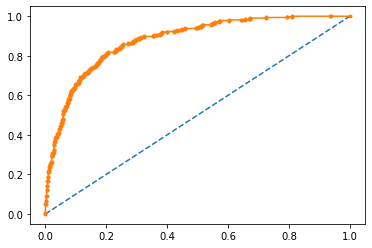

In [95]:
#AUC and ROC for the training data

#Calculate AUC
auc=metrics.roc_auc_score(y_train, pred_prob_train[:,1])
print('AUC for the training data: %.3f'%auc)

#calculate roc
fpr, tpr, threshold=metrics.roc_curve(y_train, pred_prob_train[:,1])
plt.plot([0,1],[0,1], linestyle='--')

plt.plot(fpr, tpr, marker='.',label='Training data')

AUC for the testing data: 0.913


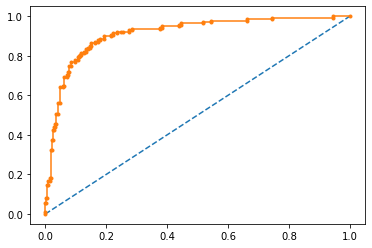

In [96]:
#AUC and ROC for the test data

#Calculate AUC
auc=metrics.roc_auc_score(y_test, pred_prob_test[:,1])
print('AUC for the testing data: %.3f'%auc)

#calculate roc
fpr, tpr, threshold=metrics.roc_curve(y_test, pred_prob_test[:,1])
plt.plot([0,1],[0,1], linestyle='--')

plt.plot(fpr, tpr, marker='.',label='Testing data')

In [97]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [98]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [99]:
#peformance matrix on train data set
y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8200562324273665
[[653  91]
 [101 222]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       744
           1       0.71      0.69      0.70       323

    accuracy                           0.82      1067
   macro avg       0.79      0.78      0.78      1067
weighted avg       0.82      0.82      0.82      1067



In [100]:
#peformance matrix on test data set
y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8558951965065502
[[292  27]
 [ 39 100]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       319
           1       0.79      0.72      0.75       139

    accuracy                           0.86       458
   macro avg       0.83      0.82      0.83       458
weighted avg       0.85      0.86      0.85       458



In [101]:
NB_model.score(X_train, y_train)

0.8200562324273665

In [102]:
NB_model.score(X_test, y_test)

0.8558951965065502

In [103]:
#KNN model

In [104]:
df1=df.copy()

#### 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [105]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [107]:
#Performance matrix on train data set
y_train_predict=KNN_model.predict(X_train)
model_score=KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8444236176194939
[[675  69]
 [ 97 226]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       744
           1       0.77      0.70      0.73       323

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [108]:
#Performance matrix on test data set
y_test_predict=KNN_model.predict(X_test)
model_score=KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7816593886462883
[[277  42]
 [ 58  81]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       319
           1       0.66      0.58      0.62       139

    accuracy                           0.78       458
   macro avg       0.74      0.73      0.73       458
weighted avg       0.78      0.78      0.78       458



In [109]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [110]:
#Performance matrix on train data set for kneighborsclassifier(n_neighbors=7)
y_train_predict=KNN_model.predict(X_train)
model_score=KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8416119962511716
[[682  62]
 [107 216]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       744
           1       0.78      0.67      0.72       323

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.84      0.84      0.84      1067



In [111]:
#Performance matrix on test data set for kneighborsclassifier(n_neighbors=7)
y_test_predict=KNN_model.predict(X_test)
model_score=KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7947598253275109
[[284  35]
 [ 59  80]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       319
           1       0.70      0.58      0.63       139

    accuracy                           0.79       458
   macro avg       0.76      0.73      0.74       458
weighted avg       0.79      0.79      0.79       458



In [112]:
#run the KNN with no of neighbors to be 1,3,5,...,17.find the optimal number of neighbors from k=1,3,5,17 using the mis classification error.

In [116]:
#empty list that will hold accuracy scores
ac_scores=[]

for k in range(1,18,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores=knn.score(X_test, y_test)
    ac_scores.append(scores)

MCE=[1-x for x in ac_scores]
MCE

[0.24454148471615722,
 0.21834061135371174,
 0.21834061135371174,
 0.20524017467248912,
 0.19650655021834063,
 0.1899563318777293,
 0.17248908296943233,
 0.1746724890829694,
 0.17030567685589515]

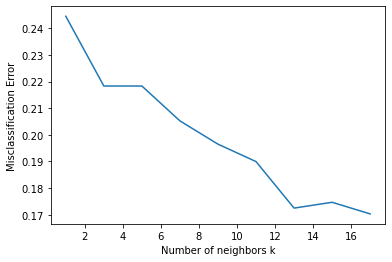

In [117]:
#plot misclassification error vs k with k value on x-axis using matplotlib
plt.plot(range(1,18,2),MCE)
plt.xlabel('Number of neighbors k')
plt.ylabel('Misclassification Error')
plt.show()

In [118]:
#for k=15 it is giving the best test accuracy lets check train and test for k = 17 with other evaluation metrics
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [119]:
#kneighbors classifier(n_neighbors=15)
y_train_predict=KNN_model.predict(X_train)
model_score=KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.823805060918463
[[688  56]
 [132 191]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       744
           1       0.77      0.59      0.67       323

    accuracy                           0.82      1067
   macro avg       0.81      0.76      0.77      1067
weighted avg       0.82      0.82      0.82      1067



In [120]:
#Performance matrix on test data set for kneighborsclassifier(n_neighbors=15)
y_test_predict=KNN_model.predict(X_test)
model_score=KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8253275109170306
[[299  20]
 [ 60  79]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       319
           1       0.80      0.57      0.66       139

    accuracy                           0.83       458
   macro avg       0.82      0.75      0.77       458
weighted avg       0.82      0.83      0.82       458



In [124]:
#The most important model evaluatio metrics here is recall. recall is a measurement of the proportion of correct positive result, ans is also known as senstivity.
#accuracy is not considered because we have an imbalanced dataser
#main idea here is to reduce the type2 error which is false negative

#### 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

In [125]:
#ADA boost
from sklearn.ensemble import AdaBoostClassifier

ADB_model=AdaBoostClassifier(n_estimators=100, random_state=1)
ADB_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [126]:
#Performance matrix on train data set for adaboostclassifier(n_estimators=100, random_state=1)
y_train_predict=ADB_model.predict(X_train)
model_score=ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8397375820056232
[[679  65]
 [106 217]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       744
           1       0.77      0.67      0.72       323

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.84      0.84      0.84      1067



In [127]:
#Performance matrix on test data set for adaboostclassifier(n_estimators=100, random_state=1)
y_test_predict=ADB_model.predict(X_test)
model_score=ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8558951965065502
[[299  20]
 [ 46  93]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       319
           1       0.82      0.67      0.74       139

    accuracy                           0.86       458
   macro avg       0.84      0.80      0.82       458
weighted avg       0.85      0.86      0.85       458



In [128]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(random_state=1)
gbcl=gbcl.fit(X_train, y_train)

In [129]:
#Performance matrix on train data set 
y_train_predict=gbcl.predict(X_train)
model_score=gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8687910028116214
[[691  53]
 [ 87 236]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       744
           1       0.82      0.73      0.77       323

    accuracy                           0.87      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.87      0.87      0.87      1067



In [130]:
#Performance matrix on test data set 
y_test_predict=gbcl.predict(X_test)
model_score=gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.868995633187773
[[301  18]
 [ 42  97]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       319
           1       0.84      0.70      0.76       139

    accuracy                           0.87       458
   macro avg       0.86      0.82      0.84       458
weighted avg       0.87      0.87      0.87       458



In [131]:
#Random forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100, random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [134]:
#Performance matrix on train data set 
y_train_predict=RF_model.predict(X_train)
model_score=RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[744   0]
 [  1 322]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       744
           1       1.00      1.00      1.00       323

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [135]:
#Performance matrix on test data set 
y_test_predict=RF_model.predict(X_test)
model_score=RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8558951965065502
[[297  22]
 [ 44  95]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       319
           1       0.81      0.68      0.74       139

    accuracy                           0.86       458
   macro avg       0.84      0.81      0.82       458
weighted avg       0.85      0.86      0.85       458



In [136]:
#SMOTE

In [138]:
from imblearn.over_sampling import SMOTE

In [140]:
sm=SMOTE(random_state=2)
Y_train=y_train.values.ravel()
X_train_res, y_train_res=sm.fit_resample(X_train, Y_train)

In [141]:
#Naive bayes with SMOTE 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [142]:
NB_SM_model=GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [ ]:
#Performance matrix on train data set 
y_train_predict=NB_SM_model.predict(X_train)
model_score=NB_SM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

In [143]:
#Performance matrix on test data set 
y_test_predict=NB_SM_model.predict(X_test)
model_score=NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8427947598253275
[[272  47]
 [ 25 114]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       319
           1       0.71      0.82      0.76       139

    accuracy                           0.84       458
   macro avg       0.81      0.84      0.82       458
weighted avg       0.85      0.84      0.85       458



In [144]:
#KNN with SMOTE
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res, y_train_res)

KNeighborsClassifier()

In [145]:
#Performance matrix on train data set 
y_train_predict=KNN_SM_model.predict(X_train_res)
model_score=KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8810483870967742
[[612 132]
 [ 45 699]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       744
           1       0.84      0.94      0.89       744

    accuracy                           0.88      1488
   macro avg       0.89      0.88      0.88      1488
weighted avg       0.89      0.88      0.88      1488



In [146]:
#Performance matrix on test data set 
y_test_predict=KNN_SM_model.predict(X_test)
model_score=KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7663755458515283
[[246  73]
 [ 34 105]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       319
           1       0.59      0.76      0.66       139

    accuracy                           0.77       458
   macro avg       0.73      0.76      0.74       458
weighted avg       0.79      0.77      0.77       458



In [147]:
#Cross validation on naive bayes model
from sklearn.model_selection import cross_val_score

scores=cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.7852349 , 0.79194631, 0.76510067, 0.77852349, 0.88590604,
       0.91946309, 0.80536913, 0.80536913, 0.80405405, 0.82432432])

In [148]:
scores=cross_val_score(NB_SM_model, X_test, y_test, cv=10)
scores

array([0.82608696, 0.86956522, 0.86956522, 0.89130435, 0.7826087 ,
       0.84782609, 0.86956522, 0.76086957, 0.91111111, 0.88888889])

#### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

In [150]:
pred_class_train=model.predict(X_train)

pred_class_test=model.predict(X_test)

Text(0.5, 1.0, 'Testing Data')

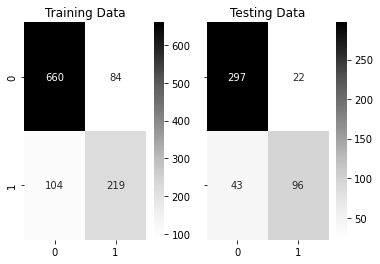

In [151]:
f, a = plt.subplots(1,2,sharex=True, sharey=True, squeeze=False)
#plot confusion matrix
plot_0=sns.heatmap((metrics.confusion_matrix(y_train, pred_class_train)), annot=True, fmt='.5g', cmap='Greys', ax=a[0][0]);a[0][0].set_title('Training Data')
a[0][0].set_title('Training Data')

plot_0=sns.heatmap((metrics.confusion_matrix(y_test, pred_class_test)), annot=True, fmt='.5g', cmap='Greys', ax=a[0][1]);a[0][1].set_title('Test Data')
a[0][1].set_title('Testing Data')

In [152]:
print('Classification Report of the training data:\n\n', metrics.classification_report(y_train, pred_class_train),'\n')
print('Classification Report of the testing data:\n\n', metrics.classification_report(y_test, pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.86      0.89      0.88       744
           1       0.72      0.68      0.70       323

    accuracy                           0.82      1067
   macro avg       0.79      0.78      0.79      1067
weighted avg       0.82      0.82      0.82      1067
 

Classification Report of the testing data:

               precision    recall  f1-score   support

           0       0.87      0.93      0.90       319
           1       0.81      0.69      0.75       139

    accuracy                           0.86       458
   macro avg       0.84      0.81      0.82       458
weighted avg       0.86      0.86      0.85       458
 



In [153]:
#Training data probability prediction
pred_prob_train=model.predict_proba(X_train)

#testing data probability prediction
pred_prob_test=model.predict_proba(X_test)

AUC for the training data: 0.879


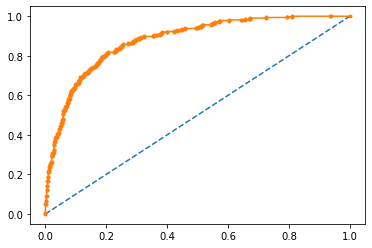

In [154]:
#AUC and ROC for the training data

#Calculate AUC
auc=metrics.roc_auc_score(y_train, pred_prob_train[:,1])
print('AUC for the training data: %.3f'%auc)

#calculate roc
fpr, tpr, threshold=metrics.roc_curve(y_train, pred_prob_train[:,1])
plt.plot([0,1],[0,1], linestyle='--')

plt.plot(fpr, tpr, marker='.',label='Training data')

AUC for the testing data: 0.913


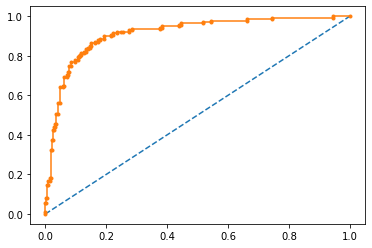

In [155]:
#AUC and ROC for the test data

#Calculate AUC
auc=metrics.roc_auc_score(y_test, pred_prob_test[:,1])
print('AUC for the testing data: %.3f'%auc)

#calculate roc
fpr, tpr, threshold=metrics.roc_curve(y_test, pred_prob_test[:,1])
plt.plot([0,1],[0,1], linestyle='--')

plt.plot(fpr, tpr, marker='.',label='Testing data')

### Problem 2:

### In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

### President Franklin D. Roosevelt in 1941
### President John F. Kennedy in 1961
### President Richard Nixon in 1973

#### 2.1 Find the number of characters, words, and sentences for the mentioned documents

In [2]:
import re
import nltk
import string
import random
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [3]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\2261092\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [4]:
d1=inaugural.raw('1941-Roosevelt.txt')
word1=inaugural.words('1941-Roosevelt.txt')
sent1=inaugural.sents('1941-Roosevelt.txt')
para1=inaugural.paras('1941-Roosevelt.txt')

In [5]:
d2=inaugural.raw('1961-Kennedy.txt')
word2=inaugural.words('1961-Kennedy.txt')
sent2=inaugural.sents('1961-Kennedy.txt')
para2=inaugural.paras('1961-Kennedy.txt')

In [6]:
d3=inaugural.raw('1973-Nixon.txt')
word3=inaugural.words('1973-Nixon.txt')
sent3=inaugural.sents('1973-Nixon.txt')
para3=inaugural.paras('1973-Nixon.txt')

In [7]:
d1

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [8]:
d2

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [9]:
d3

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [10]:
d1=d1.translate(str.maketrans('','', string.punctuation))
d1

'On each national day of inauguration since 1789 the people have renewed their sense of dedication to the United States\n\nIn Washingtons day the task of the people was to create and weld together a nation\n\nIn Lincolns day the task of the people was to preserve that Nation from disruption from within\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without\n\nTo us there has come a time in the midst of swift happenings to pause for a moment and take stock  to recall what our place in history has been and to rediscover what we are and what we may be If we do not we risk the real peril of inaction\n\nLives of nations are determined not by the count of years but by the lifetime of the human spirit The life of a man is threescore years and ten a little more a little less The life of a nation is the fullness of the measure of its will to live\n\nThere are men who doubt this There are men who believe that democracy as a form of Governme

In [11]:
d2=d2.translate(str.maketrans('','', string.punctuation))
d2

'Vice President Johnson Mr Speaker Mr Chief Justice President Eisenhower Vice President Nixon President Truman reverend clergy fellow citizens we observe today not a victory of party but a celebration of freedom  symbolizing an end as well as a beginning  signifying renewal as well as change For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago\n\nThe world is very different now For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe  the belief that the rights of man come not from the generosity of the state but from the hand of God\n\nWe dare not forget today that we are the heirs of that first revolution Let the word go forth from this time and place to friend and foe alike that the torch has been passed to a new generation of Americans  born in 

In [12]:
d3=d3.translate(str.maketrans('','', string.punctuation))
d3

'Mr Vice President Mr Speaker Mr Chief Justice Senator Cook Mrs Eisenhower and my fellow citizens of this great and good country we share together\n\nWhen we met here four years ago America was bleak in spirit depressed by the prospect of seemingly endless war abroad and of destructive conflict at home\n\nAs we meet here today we stand on the threshold of a new era of peace in the world\n\nThe central question before us is How shall we use that peace Let us resolve that this era we are about to enter will not be what other postwar periods have so often been a time of retreat and isolation that leads to stagnation at home and invites new danger abroad\n\nLet us resolve that this will be what it can become a time of great responsibilities greatly borne in which we renew the spirit and the promise of America as we enter our third century as a nation\n\nThis past year saw farreaching results from our new policies for peace By continuing to revitalize our traditional friendships and by our 

In [13]:
word1

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]

In [14]:
word2

['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]

In [15]:
word3

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]

In [16]:
sent1

[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.'], ['In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.'], ...]

In [17]:
sent2

[['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.'], ['For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.'], ...]

In [18]:
sent3

[['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':'], ['When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.'], ...]

In [19]:
para1

[[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.']], [['In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.']], ...]

In [20]:
para2

[[['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.'], ['For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.']], [['The', 'world', 'is', 'very', 'different', 'now', '.'], ['For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.'], ['And', 'yet', 'the', 'same

In [21]:
para3

[[['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':']], [['When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.']], ...]

In [22]:
c1=len([char for sentence in sent1 for word in sentence for char in word])
c2=len([char for sentence in sent2 for word in sentence for char in word])
c3=len([char for sentence in sent3 for word in sentence for char in word])
c4=c1+c2+c3

In [23]:
print('Total number of characters are ', c4)

Total number of characters are  20498


In [24]:
print('Total number of words are ', len(word1)+len(word2)+len(word3))

Total number of words are  5110


In [25]:
print('Total number of sentences are ', len(sent1)+len(sent2)+len(sent3))

Total number of sentences are  189


In [26]:
print('Total number of paragraphs are ', len(para1)+len(para2)+len(para3))

Total number of paragraphs are  116


#### 2.2 Remove all the stopwords from all three speeches

In [27]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\2261092\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\2261092\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words=list(stopwords.words('english'))
word_token1=word_tokenize(d1)
filter_sentence1=[w for w in word_token1 if not w.lower() in stop_words]
filter_sentence1=[]

for w in word_token1:
    if w not in stop_words:
        filter_sentence1.append(w)
        
print(word_token1)

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', 'In', 'Washingtons', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', 'In', 'Lincolns', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', 'To', 'us', 'there', 'has', 'come', 'a', 'time', 'in', 'the', 'midst', 'of', 'swift', 'happenings', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', 'If', 'we', 'do', 'not', 'we', 'risk', 'the', 'real', 'peril

In [29]:
print(filter_sentence1)

['On', 'national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', 'In', 'Washingtons', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'In', 'Lincolns', 'day', 'task', 'people', 'preserve', 'Nation', 'disruption', 'within', 'In', 'day', 'task', 'people', 'save', 'Nation', 'institutions', 'disruption', 'without', 'To', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', 'recall', 'place', 'history', 'rediscover', 'may', 'If', 'risk', 'real', 'peril', 'inaction', 'Lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'The', 'life', 'man', 'threescore', 'years', 'ten', 'little', 'little', 'less', 'The', 'life', 'nation', 'fullness', 'measure', 'live', 'There', 'men', 'doubt', 'There', 'men', 'believe', 'democracy', 'form', 'Government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyranny'

In [30]:
word_token2=word_tokenize(d2)
filter_sentence2=[w for w in word_token2 if not w.lower() in stop_words]
filter_sentence2=[]

for w in word_token2:
    if w not in stop_words:
        filter_sentence2.append(w)
        
print(word_token2)

['Vice', 'President', 'Johnson', 'Mr', 'Speaker', 'Mr', 'Chief', 'Justice', 'President', 'Eisenhower', 'Vice', 'President', 'Nixon', 'President', 'Truman', 'reverend', 'clergy', 'fellow', 'citizens', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', 'but', 'a', 'celebration', 'of', 'freedom', 'symbolizing', 'an', 'end', 'as', 'well', 'as', 'a', 'beginning', 'signifying', 'renewal', 'as', 'well', 'as', 'change', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', 'The', 'world', 'is', 'very', 'different', 'now', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', 'And', 'yet', 'the', 'same', 'revolutionary', 'beliefs', 'for', 'which', 'our', 'forebears', 'fought', 'are', 'still', 'at', 'issue', '

In [31]:
print(filter_sentence2)

['Vice', 'President', 'Johnson', 'Mr', 'Speaker', 'Mr', 'Chief', 'Justice', 'President', 'Eisenhower', 'Vice', 'President', 'Nixon', 'President', 'Truman', 'reverend', 'clergy', 'fellow', 'citizens', 'observe', 'today', 'victory', 'party', 'celebration', 'freedom', 'symbolizing', 'end', 'well', 'beginning', 'signifying', 'renewal', 'well', 'change', 'For', 'I', 'sworn', 'I', 'Almighty', 'God', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago', 'The', 'world', 'different', 'For', 'man', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life', 'And', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', 'belief', 'rights', 'man', 'come', 'generosity', 'state', 'hand', 'God', 'We', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution', 'Let', 'word', 'go', 'forth', 'time', 'place', 'friend', 'foe', 'alike', 'torch', 'passed', 'new', 'generation', 'Amer

In [32]:
word_token3=word_tokenize(d3)
filter_sentence3=[w for w in word_token3 if not w.lower() in stop_words]
filter_sentence3=[]

for w in word_token3:
    if w not in stop_words:
        filter_sentence3.append(w)
        
print(word_token3)

['Mr', 'Vice', 'President', 'Mr', 'Speaker', 'Mr', 'Chief', 'Justice', 'Senator', 'Cook', 'Mrs', 'Eisenhower', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', 'America', 'was', 'bleak', 'in', 'spirit', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', 'As', 'we', 'meet', 'here', 'today', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', 'The', 'central', 'question', 'before', 'us', 'is', 'How', 'shall', 'we', 'use', 'that', 'peace', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that', 'leads', 'to', 'stagnation', 'at', 'home', 'and', 'invites', 'new', 'dan

#### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

In [33]:
nltk.FreqDist(filter_sentence1).most_common(3)

[('It', 13), ('The', 10), ('know', 10)]

In [34]:
nltk.FreqDist(filter_sentence2).most_common(3)

[('us', 12), ('world', 8), ('Let', 8)]

In [35]:
nltk.FreqDist(filter_sentence3).most_common(3)

[('us', 26), ('peace', 19), ('new', 15)]

#### 2.4 Plot the word cloud of each of the speeches of the variable.

In [36]:
frequency1=pd.Series(' '.join(filter_sentence1).split()).value_counts()[:50]
frequency1

It           13
The          10
We           10
know         10
spirit        9
life          8
democracy     8
us            8
America       7
people        7
Nation        6
freedom       6
years         6
human         5
In            5
mind          5
nation        5
speaks        5
For           4
men           4
something     4
faith         4
States        4
day           4
body          4
must          4
And           3
future        3
live          3
But           3
history       3
new           3
first         3
destiny       3
person        3
free          3
alone         3
nations       3
sacred        3
like          3
United        3
task          3
within        3
came          3
continent     3
every         3
still         3
find          2
American      2
built         2
dtype: int64

In [37]:
frequency2=pd.Series(' '.join(filter_sentence2).split()).value_counts()[:50]
frequency2

us            12
Let            8
let            8
sides          8
world          8
pledge         7
new            7
But            5
free           5
To             5
I              5
citizens       5
ask            5
power          5
shall          5
hope           4
And            4
always         4
help           4
President      4
first          4
arms           4
country        4
fellow         4
peace          4
war            4
Americans      4
freedom        4
man            4
nations        4
call           4
control        3
globe          3
We             3
dare           3
life           3
poverty        3
bear           3
go             3
know           3
may            3
generation     3
human          3
The            3
join           3
never          3
begin          3
today          3
final          3
For            3
dtype: int64

In [38]:
frequency3=pd.Series(' '.join(filter_sentence3).split()).value_counts()[:50]
frequency3

us                  26
peace               19
new                 15
world               15
Let                 13
America             13
I                   12
responsibility      11
We                   9
great                9
let                  9
home                 9
Americas             8
every                7
make                 7
shall                7
years                7
government           7
role                 7
history              7
better               7
policies             7
together             6
people               6
nation               6
help                 6
time                 6
nations              6
right                6
others               5
progress             5
abroad               5
responsibilities     5
come                 5
four                 5
respect              5
one                  5
era                  5
act                  5
promise              4
faith                4
proud                4
today                4
In         

In [39]:
frequency4=pd.Series(' '.join(filter_sentence1).split()).value_counts()[-100:]
frequency4

threescore    1
man           1
lifetime      1
count         1
determined    1
             ..
undertaken    1
common        1
joined        1
women         1
God           1
Length: 100, dtype: int64

In [40]:
frequency5=pd.Series(' '.join(filter_sentence2).split()).value_counts()[-100:]
frequency5

three         1
nearly        1
prescribed    1
ranks         1
form          1
             ..
Communists    1
required      1
period        1
whatever      1
must          1
Length: 100, dtype: int64

In [41]:
frequency6=pd.Series(' '.join(filter_sentence3).split()).value_counts()[-100:]
frequency6

among         1
necessity     1
II            1
It            1
stagnation    1
             ..
endeavor      1
noblest       1
prospect      1
burden        1
purpose       1
Length: 100, dtype: int64

In [43]:
wc_a=' '.join(filter_sentence1)
wc_b=' '.join(filter_sentence2)
wc_c=' '.join(filter_sentence3)

In [44]:
#word cloud
from wordcloud import WordCloud
wordcloud=WordCloud(width=3000, height=3000, background_color='white', min_font_size=10, random_state=100).generate(wc_a)

#plot the wordcloud image
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.xlabel('Word Cloud')
plt.tight_layout(pad=0)

print('Word cloud for speech1 (after cleaning)!!')
plt.show()

ValueError: Only supported for TrueType fonts

In [ ]:
#word cloud
from wordcloud import WordCloud
wordcloud=WordCloud(width=3000, height=3000, background_color='white', min_font_size=10, random_state=100).generate(wc_b)

#plot the wordcloud image
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.xlabel('Word Cloud')
plt.tight_layout(pad=0)

print('Word cloud for speech2 (after cleaning)!!')
plt.show()

In [ ]:
#word cloud
from wordcloud import WordCloud
wordcloud=WordCloud(width=3000, height=3000, background_color='white', min_font_size=10, random_state=100).generate(wc_c)

#plot the wordcloud image
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.xlabel('Word Cloud')
plt.tight_layout(pad=0)

print('Word cloud for speech3 (after cleaning)!!')
plt.show()